<a href="https://colab.research.google.com/github/kimhwidam/Maching_Learning/blob/main/ML_3%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Label Encoder

In [1]:
import pandas as pd

df = pd.DataFrame({'A': ['a', 'b', 'c', 'a', 'b'],
                   'B': [1, 2, 3, 1, 0]})
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [3]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [4]:
le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [6]:
le.inverse_transform([0, 1, 2, 0, 1])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

## min-max scaling

In [7]:
df = pd.DataFrame({'A': [10, 20, -10, 0, 25],
                   'B': [1, 2, 3, 1, 0]})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [8]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [9]:
mms.data_max_, mms.data_min_

(array([25.,  3.]), array([-10.,   0.]))

In [10]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

## standard scaler

In [11]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [14]:
# 평균과 표준편차
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [15]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

## robust scaler

In [16]:
df = pd.DataFrame({
    'A': [-0.1, 0, 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5.0]
})
df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [17]:
from sklearn.preprocessing import RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

df_scaler = df.copy()

df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [18]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


<Axes: >

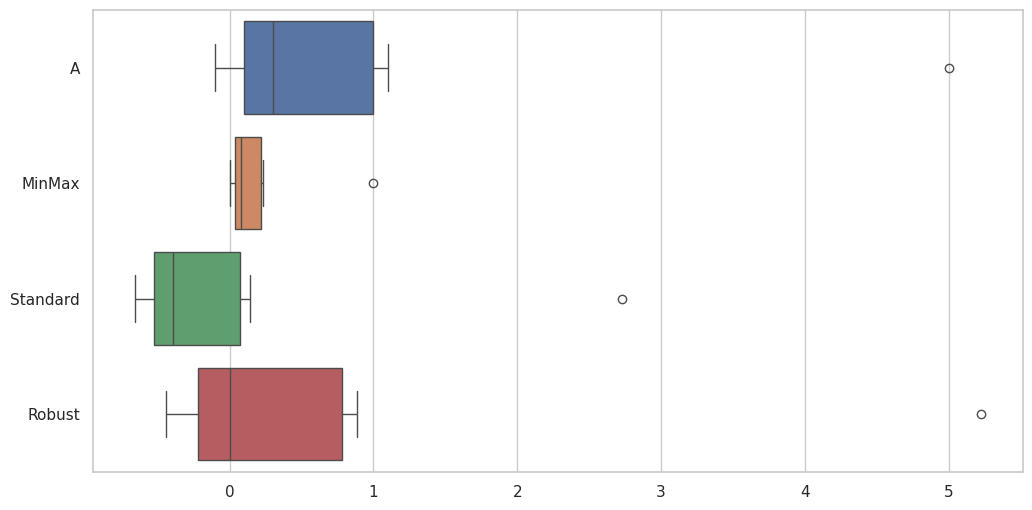

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaler, orient='h')

* A 안에는 0.1 기준으로 증감하는 데이터들 사이에 5라는 이상값이 있음
* 이상 때문에 MinMaxScaler 결과 한쪽으로 치우치게 됨
* MinMaxScaler는 이상값의 영향을 받으면 데이터가 이상해질 수 있음
* 평균과 중앙값을 쓸 때 평균 이상치를 반영하고, 중앙값은 이상치 영향을 덜 받게 됨
* StandardSCaler를 확인했을 때 평균이 반영되어 대다수의 데이터가 왼쪽으로 치우침
* RobustSCaler는 median이 0이 되고, 이상값이 그대로 유지되며 데이터에 영향을 크게 주지 않음

## ML 3일차 - 와인 데이터 분석

### 데이터 출처
레드와인 - https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv <br>
화이트와인 - https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv

In [20]:
# 데이터 불러오기
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [21]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
white_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
# 두 데이터프레임 합치기

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [24]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [25]:
# quailty 컬럼에는 3~9 등급 값
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [27]:
# quailty 별로 와인 개수 시각화
import plotly.express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [28]:
# 레드/화이트 와인별로 등급 시각화
fig = px.histogram(wine, x='quality', color='color')
fig.show()

## 레드/화이트 와인 분류기

In [29]:
# 라벨 분리, 데이터 나누기
from sklearn.model_selection import train_test_split
import numpy as np

X = wine.drop(['color'], axis=1)
y = wine['color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3913, 1284]))

In [31]:
# 훈련용과 테스트용이 레드/화이트 와인에 따라 어느 정도 구분되었는지 확인
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'], name='Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name='Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [32]:
# 훈련
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [33]:
# 학습 결과 - 훈련, 테스트 정확도
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.9553588608812776
Test Acc:  0.9569230769230769


## 데이터 preprocessing

In [34]:
# 와인 데이터의 고정 산도, 염화물, 등급 항목의 boxplot 시각화

fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='quality'))

fig.show()

In [35]:
# minmaxscaler와 standardscaler 사용
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

# minmaxscaler와 standardscaler로 처리한 값들을 새 데이터프레임으로
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

# minmaxscaler boxplot 시각화
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_mms_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_mms_pd['quality'], name='quality'))

fig.show()

In [36]:
# standardscaler boxplot 시각화
fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_ss_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_ss_pd['quality'], name='quality'))

fig.show()

In [37]:
# mimaxscaler를 적용해서 다시 학습
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.9553588608812776
Test Acc:  0.9569230769230769


In [38]:
# standardaxscaler를 적용해서 다시 학습
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.9553588608812776
Test Acc:  0.9569230769230769


decision tree에서는 이런 전처리는 거의 효과가 없음

In [39]:
# 레드와인과 화이트와인을 구분하는 중요 특성은?
# max_depth를 높이면 저 수치에도 변화가 옴
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

## 와인 맛에 대한 이진 분류

In [40]:
# 와인 맛 컬럼 생성 -> 등급 5 이상은 맛있다(1), 미만은 맛없다(0)
wine['taste'] = [1. if grade >5 else 0. for grade in wine['quality']]
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0


In [42]:
# 이 맛을 적용해 decision tree 학습
X = wine.drop(['taste'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [43]:
# 정확도
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  1.0
Test Acc:  1.0


....?? 정확도가 100%??

[Text(0.5, 0.75, 'quality <= 5.5\ngini = 0.465\nsamples = 5197\nvalue = [1907, 3290]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1907\nvalue = [1907, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3290\nvalue = [0, 3290]')]

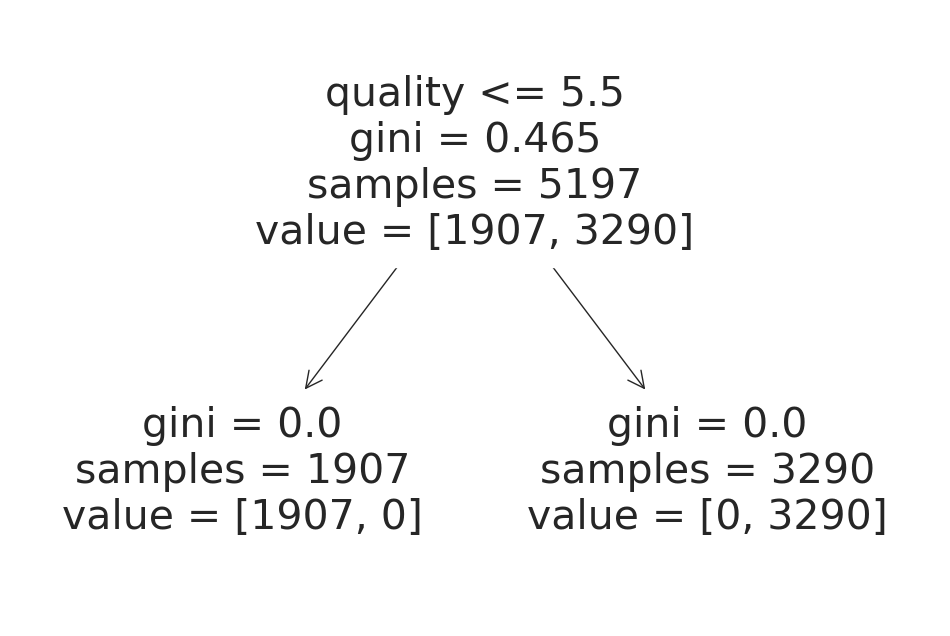

In [46]:
# 일단 decision tree 시각화를 해보자
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12, 8))
tree.plot_tree(wine_tree, feature_names=X_train.columns)

* 맛 컬럼을 만들었던 원재료(quality 컬럼)가 아직 살아 있음
* 원재료(quality 컬럼)를 가지고 학습하여 100%가 나온 것임
* 따라서 원재료(quality 컬럼)를 drop해서 다시 모델 구현 필요

In [47]:
# 다시 적용
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [48]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7294593034442948
Test Acc:  0.7161538461538461


정확도가 떨어지는 것을 볼 수 있음 -> 그럼 어떤 와인을 맛있다고 할 수 있을까?

[Text(0.5, 0.8333333333333334, 'alcohol <= 10.525\ngini = 0.465\nsamples = 5197\nvalue = [1907, 3290]'),
 Text(0.25, 0.5, 'volatile acidity <= 0.237\ngini = 0.499\nsamples = 2950\nvalue = [1546, 1404]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.397\nsamples = 791\nvalue = [216, 575]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.473\nsamples = 2159\nvalue = [1330, 829]'),
 Text(0.75, 0.5, 'free sulfur dioxide <= 13.5\ngini = 0.27\nsamples = 2247\nvalue = [361, 1886]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.439\nsamples = 427\nvalue = [139, 288]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.214\nsamples = 1820\nvalue = [222, 1598]')]

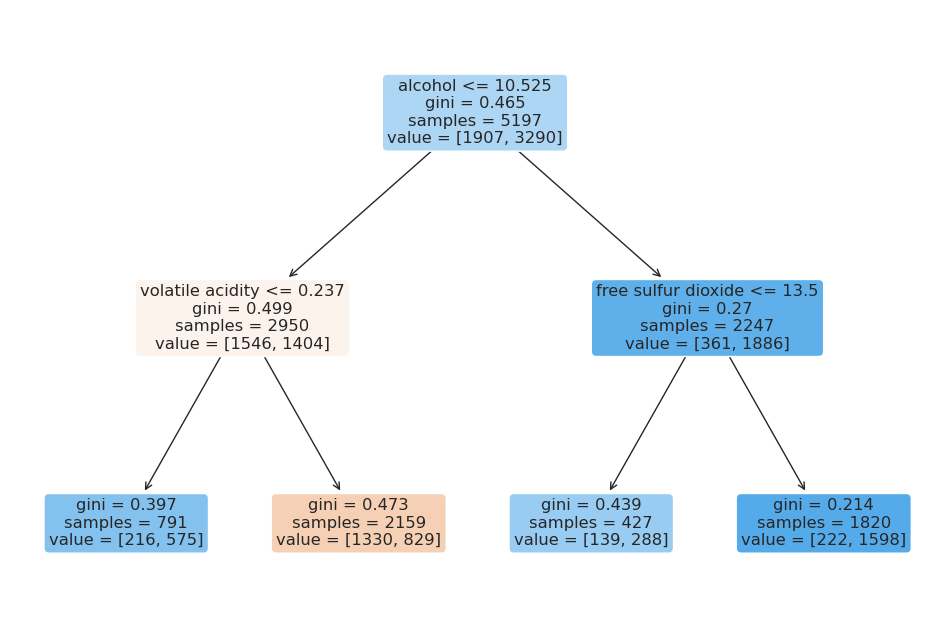

In [49]:
plt.figure(figsize=(12, 8))
tree.plot_tree(wine_tree, feature_names=X_train.columns,
               rounded=True,
               filled=True)

## 위 트리를 보면 맛 평가는 alchol이 기준인 것을 볼 수 있음

## Pipeline

In [50]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis=1)
y = wine['color']

In [51]:
# pipeline 구현
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]


pipe = Pipeline(estimators)

In [52]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [53]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [54]:
pipe.steps[0]

('scaler', StandardScaler())

In [55]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [56]:
pipe['scaler']

StandardScaler()

In [57]:
# 파라미터 지정 - 스탭이름 + 언더바 두 개 + 속성이름
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [58]:
# pipeline을 이용한 분류기 구성
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [59]:
# 정확도
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.9657494708485664
Test Acc:  0.9576923076923077


## 교차검증

In [60]:
# k-fold - sample 예제
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)

print(kf.get_n_splits(X))
print(kf)

2
KFold(n_splits=2, random_state=None, shuffle=False)


In [63]:
for train_idx, test_idx in kf.split(X):
    print('--- idx')
    print(train_idx, test_idx)
    print('--- train data')
    print(X[train_idx])
    print('--- validation data')
    print(X[test_idx])

--- idx
[2 3] [0 1]
--- train data
[[1 2]
 [3 4]]
--- validation data
[[1 2]
 [3 4]]
--- idx
[0 1] [2 3]
--- train data
[[1 2]
 [3 4]]
--- validation data
[[1 2]
 [3 4]]


In [71]:
# 그럼 다시 와인 데이터로 적용
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

In [74]:
wine['taste'] = [1. if grade >5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7294593034442948
Test Acc:  0.7161538461538461


그럼 acc를 신뢰할 수 있는지 확인하기 위해 교차검증 필요

In [76]:
# k-fold 적용 - index 반환
from sklearn.model_selection import KFold

# 5번을 나누어서 교차 검증
kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [78]:
cv_accuracy = []
# 각각의 fold에 대한 학습 후 정확도
for train_idx, test_idx in kfold.split(X):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

정확도가 다 다르게 나올 수 있음

In [79]:
# 각 정확도의 분산이 크지 않다면 평균을 대표값으로
np.mean(cv_accuracy)

0.709578255462782

In [81]:
# stratified k-fold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accuracy = []
# 각각의 fold에 대한 학습 후 정확도
for train_idx, test_idx in skfold.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
cv_accuracy

[0.5523076923076923,
 0.6884615384615385,
 0.7143956889915319,
 0.7321016166281755,
 0.7567359507313318]

In [82]:
np.mean(cv_accuracy)

0.6888004974240539

정확도의 평균이 더 나쁨

In [83]:
# 간단한 방법으로
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

In [84]:
# depth 변경해서 다시 비교
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=5, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skfold)

array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772])

depth가 높다고 무조건 정확도가 좋아지는 것은 아님

In [85]:
# train_score와 함께 보기
from sklearn.model_selection import cross_validate
cross_validate(wine_tree_cv, X, y, scoring=None, cv=skfold, return_train_score=True)

{'fit_time': array([0.02916527, 0.02932763, 0.02843285, 0.02742457, 0.02684736]),
 'score_time': array([0.0047226 , 0.00493717, 0.00495434, 0.00494576, 0.00495124]),
 'test_score': array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772]),
 'train_score': array([0.78795459, 0.78045026, 0.77568295, 0.76356291, 0.76279338])}

## 하이퍼파라미터 튜닝

In [86]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade >5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

decision tree에서는 수정해야 할 하이퍼파라미터 값은 max_depth값

* 매번 하이퍼파라미터를 수정할 순 없음
* 그래서, 수정할 파라미터를 지정 -> GridSearchCV에 알아서 cv=5겹으로 fit해라는 명령인 "GridSearchCV"를 이용

In [87]:
# GridSearchCV 사용
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [2, 4, 7, 10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

GridSearchCV 옵션 중 n_jobs라는 것이 있는데 이를 높여주면 CPU의 코어를 보다 병렬로 활용하여 속도가 빨라짐

In [88]:
# 결과
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.01772695, 0.02391191, 0.03630438, 0.05476813]),
    'mean_score_time': array([0.0055244 , 0.0050662 , 0.00500555, 0.00518661]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.7251732

In [89]:
# 최적의 성능을 가진 모델
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [90]:
gridsearch.best_score_

0.6888004974240539

In [91]:
gridsearch.best_params_

{'max_depth': 2}

In [92]:
# 그럼 pipeline을 적용해서 해보자
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]


pipe = Pipeline(estimators)

In [95]:
param_grid = [{'clf__max_depth': [2,4,7,10]}]
GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [96]:
pp.pprint(GridSearch.cv_results_)

{   'mean_fit_time': array([0.01852131, 0.02672639, 0.04018016, 0.05479259]),
    'mean_score_time': array([0.00459642, 0.0056303 , 0.00555305, 0.00684195]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65525493, 0.64416889]),
    'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'clf__max_depth': 2},
                  {'clf__max_depth': 4},
                  {'clf__max_depth': 7},
                  {'clf__max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.51692308, 0.51307692]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60230769, 0.61      ]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68206313, 0.66589684]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73979985, 0.70746728]),
    'split4_test_score': array([0.75673595, 0.718244

In [97]:
# 최적의 모델은?
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2))])

In [98]:
# 이 성능 결과들을 데이터프레임으로 저장하자
import pandas as pd

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.655255,0.085081
3,{'clf__max_depth': 10},4,0.644169,0.076510
